In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('USImport.csv', delimiter=';')
df.head()

,Date,Import Country (Source),Exporter,Importer,HS Code,Country of Origin,Country of Destination,Quantity,Qty Unit,Weight,Wgt Unit,Value (US$),Transport Mode,Products
0,2025-02-28 00:00:00,USA,SUMEC MACHINERY ELECTRIC CO LTD,FIRMAN POWER EQUIPMENT INCORPORATED,851390,CHINA,UNITED STATES,192,PKG,19680,KG,"515637,13",MARITIME,GENERATOR
1,2025-02-28 00:00:00,USA,GUANGZHOU HUIKANG ELECTRONIC TECHNO LOGY CO LTD,CHAI VISION IMPORT LLC,851390,CHINA,UNITED STATES,215,CTN,2506,KG,"65659,89",MARITIME,SAUNA
2,2025-02-27 00:00:00,USA,XUZHOU HEALTHLAND SAUNA EQUIPMENT C WEST OF XUPEI,CHAI VISION IMPORT NJ INC,851390,CHINA,UNITED STATES,57,CTN,3724,KG,"97572,8",MARITIME,SAUNA
3,2025-02-26 00:00:00,USA,ZHEJIANG CAFTP SERVICE CO LTD,AYESPRO LLC,851390,CHINA,UNITED STATES,1049,CTN,9110,KG,"238691,78",MARITIME,LIGHTS
4,2025-02-26 00:00:00,USA,ZHEJIANG TIANZHIXIN SPORTS EQUIPMEN T CO LTD,CHAI VISION IMPORT LLC,851390,CHINA,UNITED STATES,400,CTN,3200,KG,"83843,44",MARITIME,SAUNA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6185 entries, 0 to 6184
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     6185 non-null   object
 1   Import Country (Source)  6185 non-null   object
 2   Exporter                 3658 non-null   object
 3   Importer                 6185 non-null   object
 4   HS Code                  6185 non-null   int64 
 5   Country of Origin        6185 non-null   object
 6   Country of Destination   6185 non-null   object
 7   Quantity                 6185 non-null   object
 8   Qty Unit                 6185 non-null   object
 9   Weight                   6185 non-null   object
 10  Wgt Unit                 6185 non-null   object
 11  Value (US$)              6185 non-null   object
 12  Transport Mode           6185 non-null   object
 13  Products                 6185 non-null   object
dtypes: int64(1), object(13)
memory usage: 67

In [4]:
# convert 'Quantity' to integer
df['Quantity'] = df['Quantity'].str.replace(',', '.').astype(float).astype(int)

In [5]:
df['Weight'] = df['Weight'].str.replace(',', '.').astype(float)

In [6]:
df['Value (US$)'] = df['Value (US$)'].str.replace(',', '.').astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6185 entries, 0 to 6184
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     6185 non-null   object 
 1   Import Country (Source)  6185 non-null   object 
 2   Exporter                 3658 non-null   object 
 3   Importer                 6185 non-null   object 
 4   HS Code                  6185 non-null   int64  
 5   Country of Origin        6185 non-null   object 
 6   Country of Destination   6185 non-null   object 
 7   Quantity                 6185 non-null   int64  
 8   Qty Unit                 6185 non-null   object 
 9   Weight                   6185 non-null   float64
 10  Wgt Unit                 6185 non-null   object 
 11  Value (US$)              6185 non-null   float64
 12  Transport Mode           6185 non-null   object 
 13  Products                 6185 non-null   object 
dtypes: float64(2), int64(2),

In [8]:
df.describe()

,HS Code,Quantity,Weight,Value (US$)
count,6.185000e+03,6185.000000,6185.000000,6.185000e+03
mean,1.385053e+08,635.528860,14102.567683,1.755716e+05
std,1.082576e+10,1204.656417,26173.165892,4.960320e+05
min,8.513900e+05,1.000000,1.000000,0.000000e+00
25%,8.513900e+05,16.000000,2771.000000,0.000000e+00
50%,8.513900e+05,44.000000,8000.000000,0.000000e+00
75%,8.513900e+05,759.000000,10824.000000,1.082104e+05
max,8.513900e+11,9296.000000,255559.000000,4.450822e+06


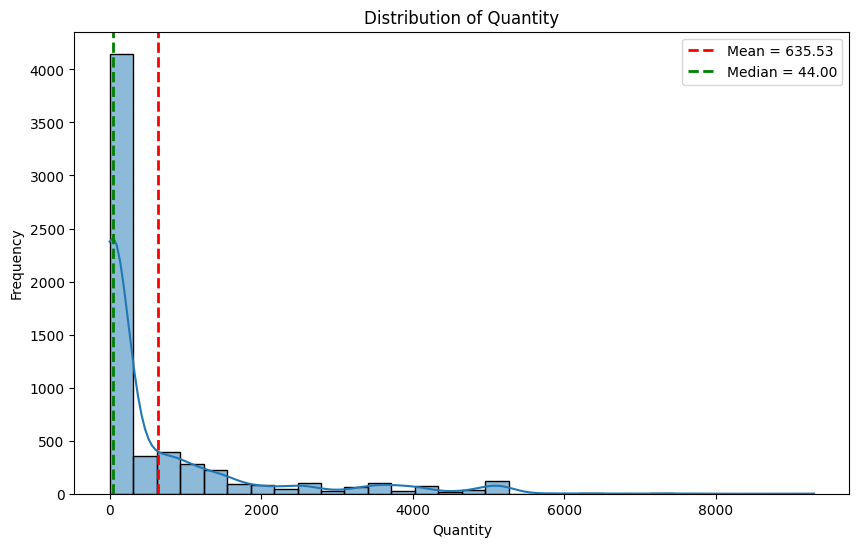

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df['Quantity'], bins=30, kde=True)
plt.axvline(df['Quantity'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {df["Quantity"].mean():.2f}')
plt.axvline(df['Quantity'].median(), color='green', linestyle='--', linewidth=2, label=f'Median = {df["Quantity"].median():.2f}')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [10]:
print(f'Mean of quantity: {df['Quantity'].mean():.2f}')
print(f'Median of quantity: {df['Quantity'].median():.2f}')
print(f'Mode of quantity: {df['Quantity'].mode()[0]}')
print(f'Std of quantity: {df['Quantity'].std():.2f}')
print(f'CV of quantity: {(df['Quantity'].std() / df['Quantity'].mean()) * 100:.2f}%')

Mean of quantity: 635.53
Median of quantity: 44.00
Mode of quantity: 44
Std of quantity: 1204.66
CV of quantity: 189.55%


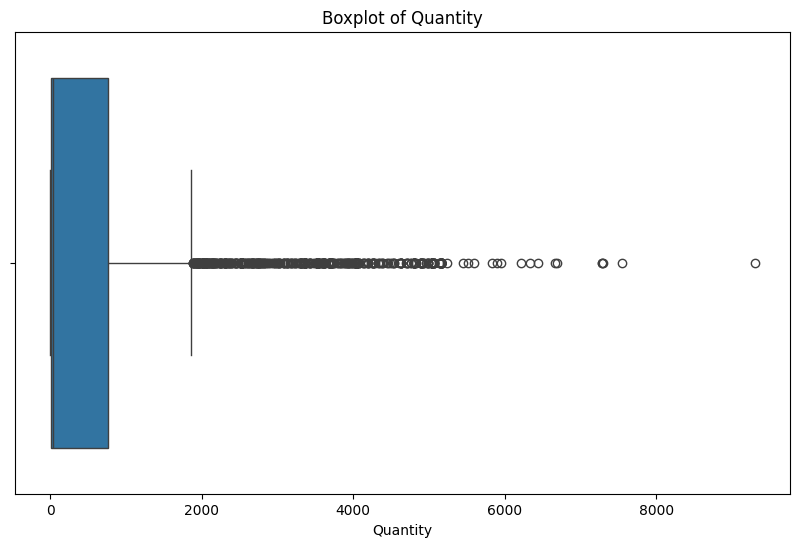

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')
plt.show()

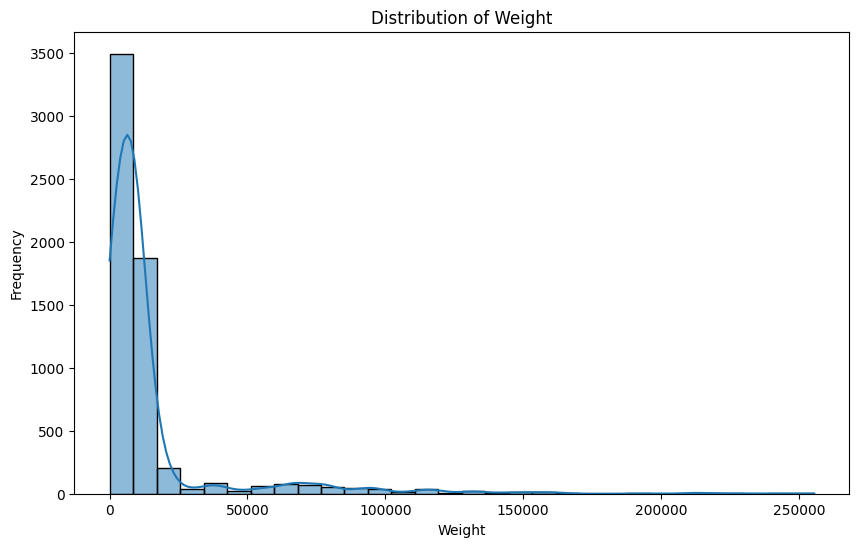

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['Weight'], bins=30, kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

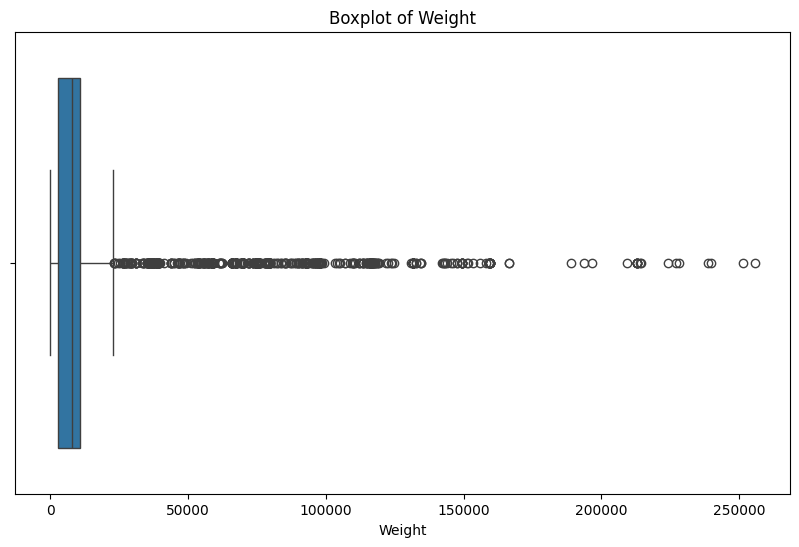

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Weight'])
plt.title('Boxplot of Weight')
plt.xlabel('Weight')
plt.show()

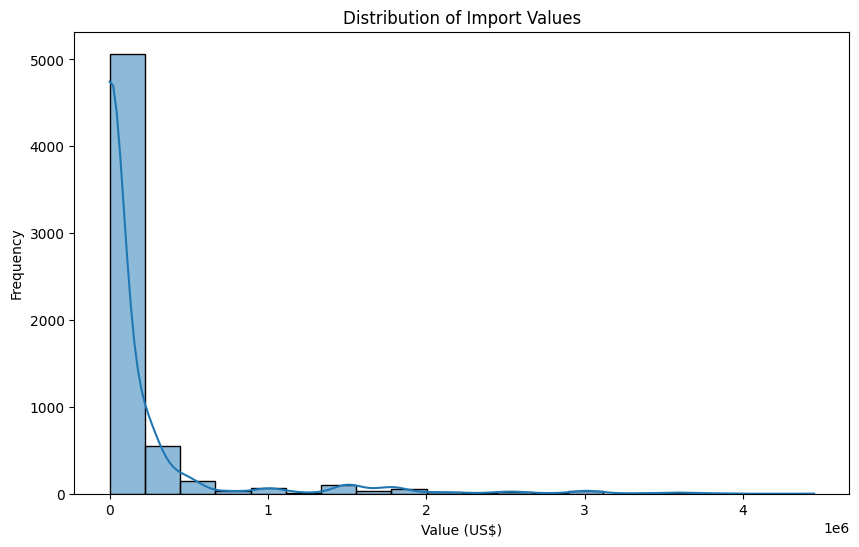

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df['Value (US$)'], bins=20, kde=True)
plt.title('Distribution of Import Values')
plt.xlabel('Value (US$)')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

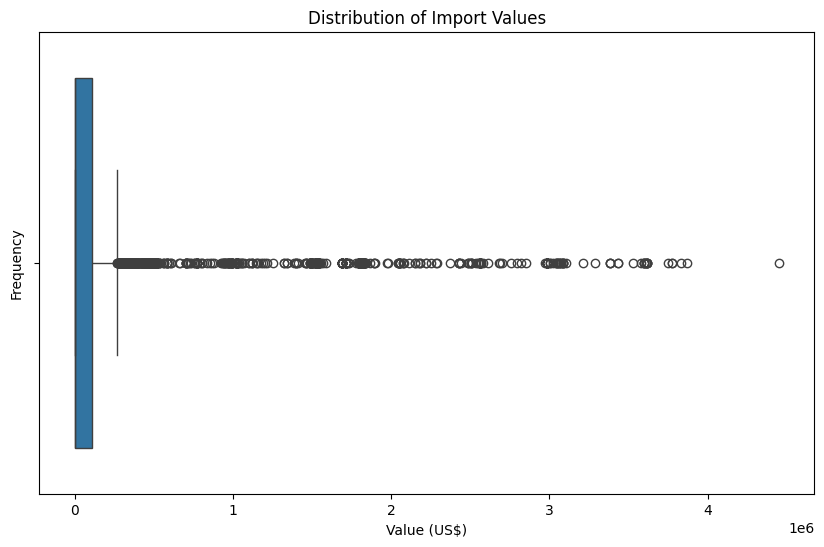

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Value (US$)'])
plt.title('Distribution of Import Values')
plt.xlabel('Value (US$)')
plt.ylabel('Frequency')